In [22]:
import numpy as np
import keras.backend as K
from matplotlib import pyplot as plt
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Input, Dense, Conv2D, AveragePooling2D, MaxPool2D, Flatten, Activation
from keras.datasets import cifar10
from keras.utils import np_utils
from keras.layers import BatchNormalization as BN
from keras.layers import Dropout
%matplotlib inline

In [23]:
def show_data(data, label, rows=2, cols=5):
    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    fig.subplots_adjust(hspace=0.8, wspace=0.8)
    for idx in range(1, (rows*cols)+1):
        plt.subplot(rows, cols, idx)
        plt.imshow(data[idx-1])
        plt.title("Lable=%s"%label[idx-1])

In [24]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train[0].shape

(32, 32, 3)

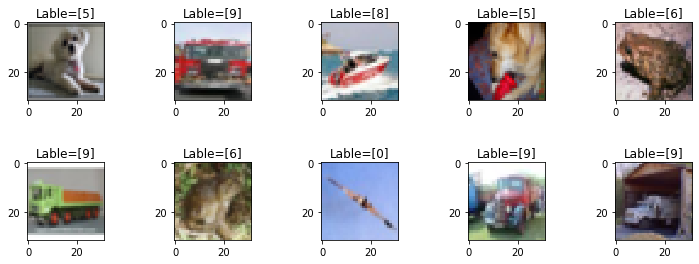

In [25]:
idx = np.random.randint(0, x_train.shape[0], (10,))
show_data(x_train[idx], y_train[idx])

## Build my image classification model

In [35]:
input_layer = Input(shape = (32, 32, 3))
conv1 = Conv2D(filters=32, kernel_size=(3,3),padding='same')(input_layer)
conv1_activate = Activation('relu')(conv1)
bn_1 = BN()(conv1_activate)
conv2 = Conv2D(filters=32, kernel_size=(3,3),padding='same')(bn_1)
conv2_activate = Activation('relu')(conv2)
bn_2 = BN()(conv2_activate)
cpool1 = MaxPool2D()(bn_2)
dropout_1 = Dropout(0.5)(cpool1)
conv3 = Conv2D(filters=64, kernel_size=(3,3),padding='same')(dropout_1)
conv3_activate = Activation('relu')(conv3)
bn_3 = BN()(conv3_activate)
conv4 = Conv2D(filters=64, kernel_size=(3,3),padding='same')(bn_3)
conv4_activate = Activation('relu')(conv4)
bn_4 = BN()(conv4_activate)
conv5 = Conv2D(filters=128, kernel_size=(3,3),padding='same')(bn_4)
conv5_activate = Activation('relu')(conv5)
bn_5 = BN()(conv5_activate)
cpool2 = MaxPool2D()(bn_5)
dropout_2 = Dropout(0.5)(cpool2)
# cpool2 = AveragePooling2D()(bn_5)
# dropout_2 = Dropout(0.5)(cpool2)
# conv6 = Conv2D(filters=128, kernel_size=(5,5))(dropout_2)
# conv6_activate = Activation('relu')(conv6)
# bn_6 = BN()(conv6_activate)
# conv7 = Conv2D(filters=256, kernel_size=(5,5))(bn_6)
# conv7_activate = Activation('relu')(conv7)
# bn_7 = BN()(conv7_activate)
# cpool3 = MaxPool2D()(bn_7)
# dropout_3 = Dropout(0.5)(cpool3)
flat_v = Flatten()(dropout_2)
dense1 = Dense(512, activation='relu')(flat_v)
dropout_3 = Dropout(0.5)(dense1)
# dense2 = Dense(1024, activation='relu')(dropout_layer1)
# dropout_layer2 = Dropout(0.5)(dense2)
output_layer = Dense(10, activation='softmax')(dropout_3)
model = Model(input_layer, output_layer)
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_11 (InputLayer)        (None, 32, 32, 3)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_55 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_55 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_56 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_56 (Batc (None, 32, 32, 32)        128       
__________

In [36]:
fit_y_train = np_utils.to_categorical(y_train)
pred_y_test = np_utils.to_categorical(y_test)

In [37]:
trianing_history = model.fit(x=x_train, y=fit_y_train, validation_data=[x_test, pred_y_test], epochs=30, batch_size=256)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 32s 649us/step - loss: 2.3415 - acc: 0.3394 - val_loss: 3.4669 - val_acc: 0.2314
Epoch 2/30
50000/50000 [==============================] - 29s 583us/step - loss: 1.5392 - acc: 0.4883 - val_loss: 2.2105 - val_acc: 0.3062
Epoch 3/30
50000/50000 [==============================] - 29s 581us/step - loss: 1.3729 - acc: 0.5538 - val_loss: 1.3177 - val_acc: 0.5831
Epoch 4/30
50000/50000 [==============================] - 29s 583us/step - loss: 1.2185 - acc: 0.6046 - val_loss: 2.2213 - val_acc: 0.4177
Epoch 5/30
50000/50000 [==============================] - 29s 579us/step - loss: 1.1635 - acc: 0.6308 - val_loss: 1.6788 - val_acc: 0.5125
Epoch 6/30
50000/50000 [==============================] - 30s 591us/step - loss: 1.0631 - acc: 0.6572 - val_loss: 1.1115 - val_acc: 0.6386
Epoch 7/30
50000/50000 [==============================] - 35s 707us/step - loss: 1.0058 - acc: 0.6741 - val_loss: 0.